# Linear Regression Demo

---

## importing libraries and data 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Student Study Hour V2.csv
data = pd.read_csv('Student Study Hour V2.csv')
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [4]:
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
25    1.3      19
26    2.6      30
27    6.1      63


## visualizing data

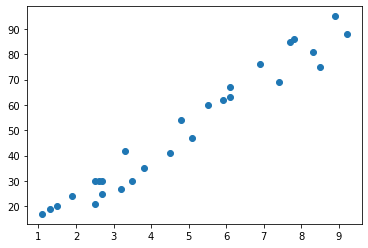

In [5]:
plt.scatter(data.Hours,data.Scores)

## Mean Squared Error (Loss) Function Code

In [6]:
"""

m - slope
b - bias/y-intercept
points - dataframe

"""

def MeanSquaredError(m,b,points): # or lossFunction
    totalError = 0
    for i in range(len(points)): # getting sum of points
        
        # points is assumed to be a pandas DataFrame
        # iloc[i] is used to access the i-th row of the DataFrame points
        # it retrieves the row as a pandas Series, where you can access individual columns by their column names or index positions.
        # studytime is used to access the value in the column named "Hours" for the i-th row of the DataFrame 
        # assuming that "Hours" is a column in the DataFrame points
        
        x = points.iloc[i].Hours 
        y = points.iloc[i].Scores
        totalError += (y - (m*x + b)) ** 2 # this is our error function
        
    totalError = float(len(points))

## Gradient Descent Function Code

In [7]:
def GradientDescent(mNow,bNow, points, L):
    mGradient = 0
    bGradient = 0
    
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores
        
        # this is the partial derivative with respect to 'm' 
        mGradient += -(2/n) * x * (y- (mNow * x + bNow))
        
        # this is the partial derivative with respect to 'b' 
        bGradient += -(2/n) * (y - (mNow * x + bNow))
        
    m = mNow - mGradient * L
    b = bNow - bGradient * L 
    
    return m,b

Epoch: 0, m:0, b:0
Epoch: 50, m:9.4947653386804, b:1.597152107395178
Epoch: 100, m:9.905850022491457, b:1.696646652081573
Epoch: 150, m:9.919091199713185, b:1.7299358490916958
Epoch: 200, m:9.914999620871255, b:1.759741350646228
Epoch: 250, m:9.910242919089596, b:1.788822655050309
Epoch: 300, m:9.905549377533982, b:1.8173121767181892
Epoch: 350, m:9.900949040064793, b:1.8452270093021435
Epoch: 400, m:9.896441399313423, b:1.8725789667312784
Epoch: 450, m:9.892024646279722, b:1.899379408525996
Epoch: 500, m:9.887696950968998, b:1.9256394556861138
Epoch: 550, m:9.883456517768217, b:1.951370004556626
Epoch: 600, m:9.879301587160157, b:1.976581731754311
Epoch: 650, m:9.875230435101047, b:2.0012850986156328
Epoch: 700, m:9.871241372309925, b:2.0254903555383352
Epoch: 750, m:9.867332743567856, b:2.0492075462347774
Epoch: 800, m:9.86350292703117, b:2.072446511899451
Epoch: 850, m:9.859750333558484, b:2.095216895292496
Epoch: 900, m:9.85607340605128, b:2.117528144740846
Epoch: 950, m:9.85247061

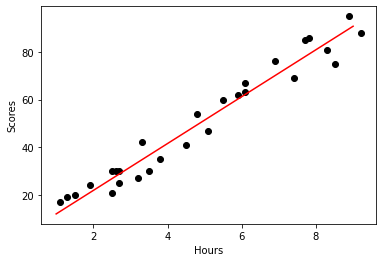

In [8]:
m = 0
b = 0
L = 0.001
epochs = 1000 # iterations

for i in range(epochs):
    if i % 50 == 0:
            print(f"Epoch: {i}, m:{m}, b:{b}")
    m,b = GradientDescent(m,b,data,L)
    
print(f"Slope: {m}, Bias:{b}")

plt.scatter(data.Hours, data.Scores, color="black")

# regression line
plt.plot(list(range(1,10)), [m * x + b for x in range(1,10)], color="red")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()